# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

0.23809523809523808


1.0

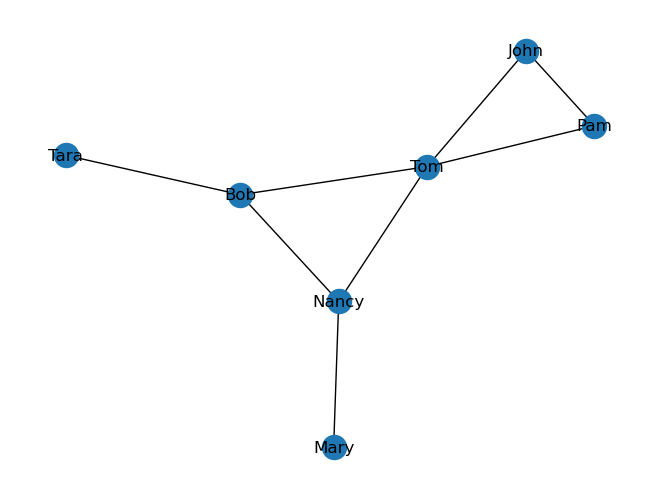

In [2]:
Fig35=nx.Graph()
Fig35.add_nodes_from(["Mary", "Nancy", "Tom", "John", "Pam", "Bob", "Tara"])
Fig35.add_edges_from([("Mary", "Nancy"), ("Nancy", "Tom"), ("Tom", "John"), ("Tom", "Pam"), ("John", "Pam"), ("Tom", "Bob"), ("Bob", "Tara"), ("Bob", "Nancy")])

nx.draw(Fig35, with_labels=True)

def kans_op_knoop(G,knoop):
    #WRITE YOUR CODE HERE
#     neighbors = list(G.neighbors(knoop))
#     total= 0
#     for i in neighbors:
#         total += ((1/G.degree(i)) * (1/len(G.nodes())))
    return sum((1 / G.degree(i)) * (1 / len(G.nodes())) for i in list(G.neighbors(knoop)))


H= nx.karate_club_graph() 
# test
print(kans_op_knoop(Fig35, "Tom"))
sum(kans_op_knoop(H,x) for x in H)
#kans_op_knoop(H,1)

## ANTWOORD
#2. de kans dat je Tom vindt met de "random friend of picked person" methode is de som voor alle buren van Tom van 1/7 * 1/degree van die buur, dus dan wordt het 1/7*1/2 + 1/7*1/2 + 1/7*1/3 + 1/7*1/3 

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

546
15220


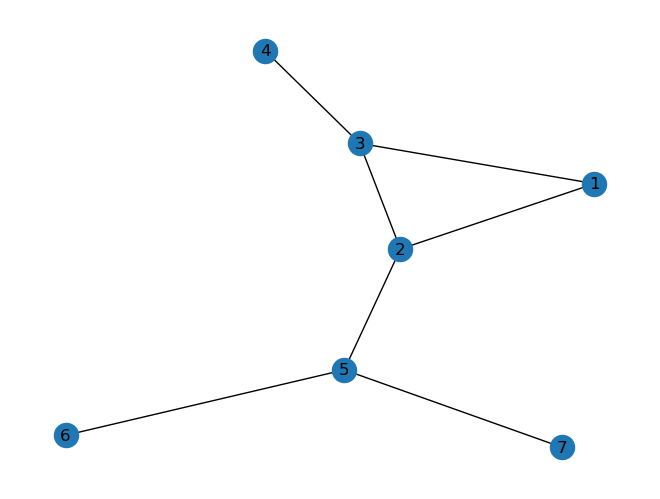

In [4]:
# # 3.11
Fig310 = nx.Graph()
Fig310.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
Fig310.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (2, 5), (5, 6), (5, 7)])
nx.draw(Fig310, with_labels=True)

# # Degree centrality
#max_degree_centrality = max(degree_centrality.values())
#highest_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality == max_degree_centrality]

# # Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(Fig310)
highest_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)

# # Closeness centrality
closeness_centrality = nx.closeness_centrality(Fig310)
highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)

# highest_degree_centrality_nodes, highest_betweenness_centrality, highest_closeness_centrality

# # 3.12
# the graph would likely exhibit a few highly connected nodes (hubs) with many edges radiating from them, while the remaining nodes would have fewer connections.

# # 3.13
# 1. it is unlikely to see a heavy-tailed distribution for the shoe size of UK adults. Shoe sizes tend to follow a more symmetric distribution centered around the average shoe size.
# 2. it is highly likely to see a heavy-tailed distribution for US household income. Income distributions often exhibit a long tail with a few high-income individuals or households, resulting in a heavy-tailed distribution. 
# 3. it is likely to see a heavy-tailed distribution for node degree in the Twitter social network. Social networks often exhibit a scale-free property, where a small number of nodes (influencers, celebrities, or popular accounts) have a significantly higher number of connections (followers or friends) compared to the majority of nodes.
# 4. it is unlikely to see a heavy-tailed distribution for pairwise distance in the Wikipedia network. Pairwise distance typically represents the distance or number of hops between nodes in a network. In most networks, including the Wikipedia network, the pairwise distance tends to follow a more symmetric distribution without extreme outliers.

# # 3.14
# no


# # 3.15
# 1. 1e+08
# 2. 1e+07
# 3. 100000

# 3.17
fname ='../../../data/Week6/openflights_usa.edges.gz'
G= nx.Graph()
G = nx.read_edgelist(fname)
print(len(G))

# 1
average_number_of_routes = len(G.edges())/ len(G.nodes())

# 2
top_five_airports = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]

# 3 
single_route = sum( 1 for node in G.nodes() if G.degree(node) == 1)

# 4
closeness_centrality = nx.closeness_centrality(G)
highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)

#5 
betweenness_centrality = nx.betweenness_centrality(G)
highest_betweennes_centrality = max(betweenness_centrality, key=betweenness_centrality.get)

#6 
degrees = dict(G.degree())
N = len(degrees)
sum_d = sum(degrees.values())
sum_d_squared = sum([d**2 for d in degrees.values()])
heterogeneity = (sum_d_squared - (sum_d**2 / N)) / ((sum_d / N)**2)


average_number_of_routes, top_five_airports, single_route, highest_closeness_centrality, highest_betweennes_centrality, heterogeneity

# 3.18
fname = '../../../data/Week6/enwiki_math.edges.gz'
G = nx.read_edgelist(fname, create_using=nx.DiGraph())
print(len(G))

# 1
in_degrees = dict(G.in_degree())
average_in_degree = sum(in_degrees.values()) / len(in_degrees)

out_degrees = dict(G.out_degree())
average_out_degree = sum(out_degrees.values()) / len(out_degrees)
 
# the average in-degree and the average out-degree are the same, it indicates that, 
# on average, each node receives the same number of incoming edges as it sends out. 
# This suggests a balanced flow of connections within the network.

# 2 
highest_in_degree = max(dict(G.in_degree()), key=in_degrees.get)

highest_in_degree

# 3
highest_out_degree = max(dict(G.out_degree()), key=out_degrees.get)

#4 
degree_of_node_highest_in_degree= G.in_degree('47738065')
degree_of_node_highest_out_degree= G.out_degree('1152126')

# the maximum in-degree is greater. 

# 5 
#in-degree
in_degrees = dict(G.in_degree())
N = len(in_degrees)
sum_d = sum(in_degrees.values())
sum_d_squared = sum([d**2 for d in in_degrees.values()])
heterogeneity_in = (sum_d_squared - (sum_d**2 / N)) / ((sum_d / N)**2)

# 6
# out-degree
out_degrees = dict(G.out_degree())
N = len(out_degrees)
sum_d = sum(out_degrees.values())
sum_d_squared = sum([d**2 for d in out_degrees.values()])
heterogeneity_out = (sum_d_squared - (sum_d**2 / N)) / ((sum_d / N)**2)


average_in_degree, average_out_degree, highest_out_degree, highest_in_degree, degree_of_node_highest_in_degree, degree_of_node_highest_out_degree, heterogeneity_in, heterogeneity_out
# 3.19
def avg_degree_neighbors(G, node):
    neighbors = list(G.neighbors(node))
    degrees = [G.degree(neighbor) for neighbor in neighbors]
    return sum(degrees) / len(degrees)

# # 3.20 
# Networks where the average number of neighbors of a node's neighbors matches the average degree have a specific property known as the assortativity coefficient. 
# # 3.21
# Networks with heavy-tailed degree distributions are generally more vulnerable to targeted attacks compared to random attacks. Heavy-tailed degree distributions are characterized by a few highly connected nodes (hubs) and a large number of poorly connected nodes. Targeted attacks specifically aim at removing the most highly connected nodes, which disrupts the network structure and connectivity more significantly in networks with heavy-tailed degree distributions. By targeting the hubs, the attacker can effectively fragment the network into smaller disconnected components.

# # 3.22
# d, Betweenness centrality measures the extent to which a node or an edge lies on the shortest paths between pairs of other nodes in the network. Nodes or edges with high betweenness centrality play a critical role in facilitating communication and information flow between different parts of the network. Removing nodes or edges with high betweenness centrality can significantly disrupt the network's connectivity and increase the average path length.
# # 3.23 
#  the node with a low clustering coefficient would intuitively be a better target if the goal is to disrupt the network.